# Tugas Time Series

<h3>Kelompok 3:</h3>

- (2001984) Hagai Brayen Setiawan
- (2001680) Muhammad Ridha Samudra
- (2000831) Nyoman Ari Satyadharma
- (2007874) Raihan Fitrah V Ramadhan

<h2> Overview </h2>

Dataset yang digunakan merupakan nilai tukar mata uang Dollar AS terhadap Rupiah Indonesia

Sumber Dataset: https://www.bi.go.id/id/statistik/informasi-kurs/transaksi-bi/default.aspx

## Import Library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

## Import dan Cek Atribut Dataset

In [14]:
df = pd.read_csv("C:\\University Workspace\\Data Mining\\Time Series\\Kurs Transaksi Harian USD_IDR BI.csv")
df.head(5)

,No,Nilai,Kurs Jual,Kurs Beli,Tanggal
0,1,1,14175.53,14034.48,12/31/2020
1,2,1,14175.53,14034.48,12/30/2020
2,3,1,14239.85,14098.16,12/29/2020
3,4,1,14254.92,14113.08,12/28/2020
4,5,1,14353.41,14210.59,12/25/2020


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         2453 non-null   int64  
 1   Nilai      2453 non-null   int64  
 2   Kurs Jual  2453 non-null   float64
 3   Kurs Beli  2453 non-null   float64
 4   Tanggal    2453 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 95.9+ KB


<h4>
    Dataset nilai tukar mata uang Dollar AS terhadap Rupiah Indonesia
    Terdiri dari atribut No, Nilai, Kurs Jual, Kurs Beli, dan Tanggal
</h4>

## Drop Atribut & Mengubah Datatype Atribut Tanggal

In [16]:
df = df.drop(['No','Nilai'], axis=1)

In [17]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)
df.head()

,Kurs Jual,Kurs Beli
Tanggal,,
2020-12-31,14175.53,14034.48
2020-12-30,14175.53,14034.48
2020-12-29,14239.85,14098.16
2020-12-28,14254.92,14113.08
2020-12-25,14353.41,14210.59


<h4>
    Atribut 'No' dan 'Nilai' dihapus 
    karena atribut Nomor tidak diperlukan
    dan semua data atribut Nilai bernilai 1
</h4>

<h4>
    Atribut Tanggal diubah menjadi Index
</h4>

## Dataset Final

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2453 entries, 2020-12-31 to 2011-01-03
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kurs Jual  2453 non-null   float64
 1   Kurs Beli  2453 non-null   float64
dtypes: float64(2)
memory usage: 57.5 KB


In [19]:
df

,Kurs Jual,Kurs Beli
Tanggal,,
2020-12-31,14175.53,14034.48
2020-12-30,14175.53,14034.48
2020-12-29,14239.85,14098.16
2020-12-28,14254.92,14113.08
2020-12-25,14353.41,14210.59
...,...,...
2011-01-07,9047.00,8957.00
2011-01-06,9039.00,8949.00
2011-01-05,9032.00,8942.00


In [20]:
df.describe()

,Kurs Jual,Kurs Beli
count,2453.000000,2453.000000
mean,12413.855650,12290.291647
std,2069.691546,2049.089880
min,8502.000000,8418.000000
25%,9989.000000,9889.000000
50%,13331.000000,13199.000000
75%,14062.000000,13922.040000
max,16824.710000,16657.300000


<h4>
    Dataset final yang akan digunakan terdiri dari Kurs Jual dan Kurs Beli
</h4>

## Visualisasi

### Boxplot

<AxesSubplot:xlabel='Kurs Jual'>

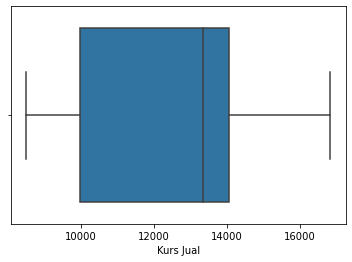

In [22]:
sns.boxplot(x="Kurs Jual", data=df)

<h4>
    Atribut Kurs Jual tidak memiliki Outlier, artinya tidak ada data dengan nilai yang ekstrim
</h4>

<h4>
    Atribut Kurs Jual memiliki nilai Q1 di sekitar 10.000, Median di sekitar 13.500, dan Q3 di sekitar 14.000
</h4>

<AxesSubplot:xlabel='Kurs Beli'>

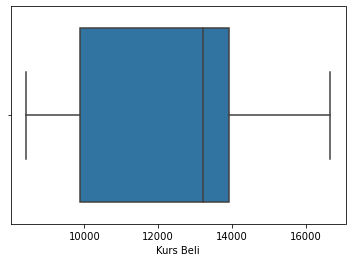

In [23]:
sns.boxplot(x="Kurs Beli", data=df)

<h4>
    Atribut Kurs Beli tidak memiliki Outlier, artinya tidak ada data dengan nilai yang ekstrim
</h4>

<h4>
    Atribut Kurs Jual memiliki nilai Q1 di sekitar 10.000, Median di sekitar 13.500, dan Q3 di sekitar 14.000
</h4>

### Lineplot

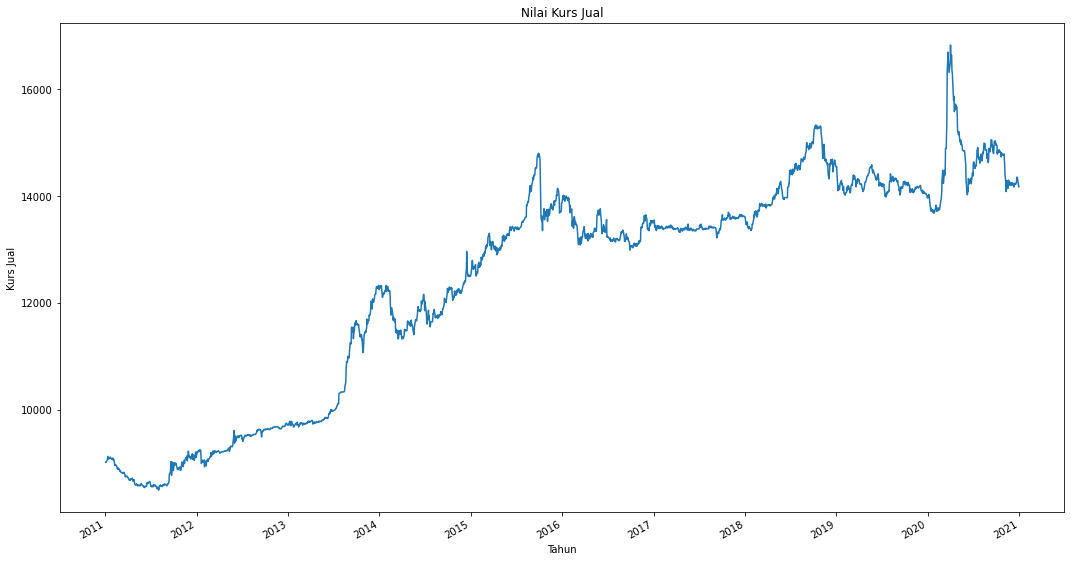

In [27]:
plt.figure(figsize=(18, 10)) # resizing the plot
df['Kurs Jual'].plot()
plt.title('Nilai Kurs Jual') # adding a title
plt.xlabel('Tahun') # x label
plt.ylabel('Kurs Jual') # y label
plt.show()

<h4>
    Grafik lineplot pada atribut Kurs Jual menunjukan kenaikan nilai tukar mata uang Dollar AS terhadap Rupiah Indonesia dengan nilai tertinggi terdapat di sekitar pertengahan tahun 2020
</h4>

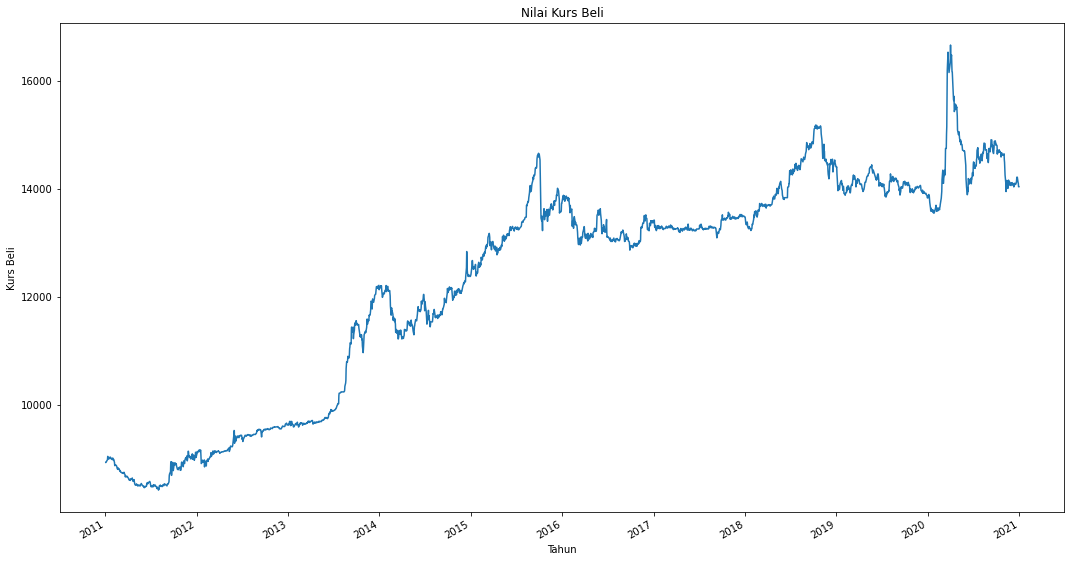

In [29]:
plt.figure(figsize=(18, 10)) # resizing the plot
df['Kurs Beli'].plot()
plt.title('Nilai Kurs Beli') # adding a title
plt.xlabel('Tahun') # x label
plt.ylabel('Kurs Beli') # y label
plt.show()

<h4>
    Grafik lineplot pada atribut Kurs Beli menunjukan kenaikan nilai tukar mata uang Dollar AS terhadap Rupiah Indonesia dengan nilai tertinggi terdapat di sekitar pertengahan tahun 2020
</h4>